# Chapter 2

### 2.10.2 Basic Signals and Signal Graphing
We first provide the implementation of three basic functions when a time vector $t$ is defined:
* ustep: implements the unit step function $u(t)$
* rect: implements the standard rectangular function $rect(t)$
* triangl: implements standard triangle function $\Delta(t)$

In [1]:
# Import Python packages
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import quad
# The lines above are for loading Python packages

In [4]:
# Save this file as CompEX02a.py
# The unit step function is a function of time ‘t’.
# Usage y = ustep(t)
# ustep(t) = 0 if t < 0
# ustep(t) = 1, if t >= 1
# t - must be real-valued and can be a vector or a matrix

def ustep(t):
    y = np.array(t>=0, dtype=float)
    return y

# The rectangular function is a function of time ‘t’.
# Usage y = rect(t)
# t - must be real-valued and can be a vector or a matrix
#
# rect(t) = 1, if |t| < 0.5
# rect(t) = 0, if |t| > 0.5

def rect(t):
    y = np.array((np.sign(t+0.5)-np.sign(t-0.5)) > 0, dtype=float)
    return y

# The triangular function is a function of time ‘t’.
# Usage y = triangl(t)
# t - must be real-valued and can be a vector or a matrix
#
# triangl(t) = (1 - |t|), if |t| < 1
# triangl(t) = 0, if |t| >= 1

def triangl(t):
    y = np.array((1 - np.abs(t)) * ((t >= -1) & (t < 1)), dtype=float)
    return y

We now show how to use Python to generate a simple signal plot through an example program. In this example, we construct and plot a signal
$$y(t) = e^{−t}sin(8\pi t)u(t+1)$$
The result of this program is shown in Fig. 2.27.

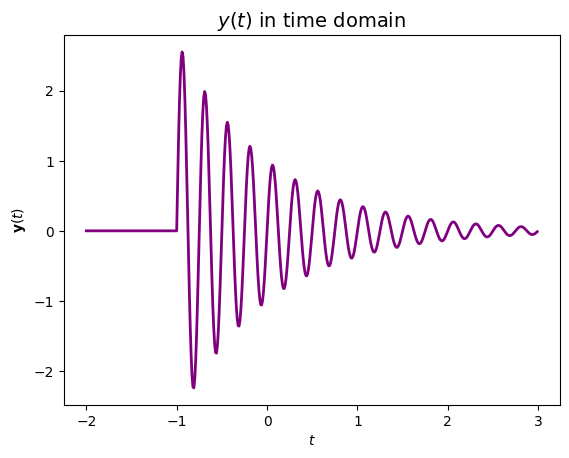

In [5]:
# Save this file as CompEX02b.py
"""To graph a signal, the first step is to determine x-axis and y-axis to plot
We can first decide the length of x-axis to plot"""
t = np.arange(-2, 3, 0.01) # "t" is from -2 to 3 in 0.01 increment

# Then evaluate the signal over the range of "t" to plot
y = np.exp(-t) * np.sin(8 * np.pi * t) * ustep(t+1)


fig1 = plt.figure()
# plot t vs y in the figure
plt.plot(t, y, linewidth=2, color="purple")              # choose a wider line-width

# label x-axis and y-axis
plt.xlabel(r'$\it{t}$')                  # use italic ‘t’ to label x-axis
plt.ylabel(r'${\bf y}({\it t })$')       # use boldface ‘y’ to label y-axis

# add title
plt.title(r"${\it y(t)\mathrm{\ in\ time\ domain}}$", fontsize=14) # use subscript
plt.show(fig1)

<center><b>Figure 2.27</b> Graphing a signal.</center>

### 2.10.3 Signal Operations
Some useful signal operations introduced in Sec. 2.3 can be implemented and illustrated by means of Python. We provide the example program to demonstrate the basic operations. First, we generate a segment of an exponentially decaying function
$$ y(t) = e^{-|t|/4}[ u(t)-u(t-4) ] $$
We then apply time scaling and time shifting to generate new signals
$$ y_1(t) = y(2t)\qquad y_2(t) = y(t+2) $$
Finally, time scaling, time inversion, and time shifting are all utilized to generate a new signal
$$ y_3(t) = y(2−2t) $$
The original signal $ y(t) $ and its transformations are all given in Fig. 2.28.

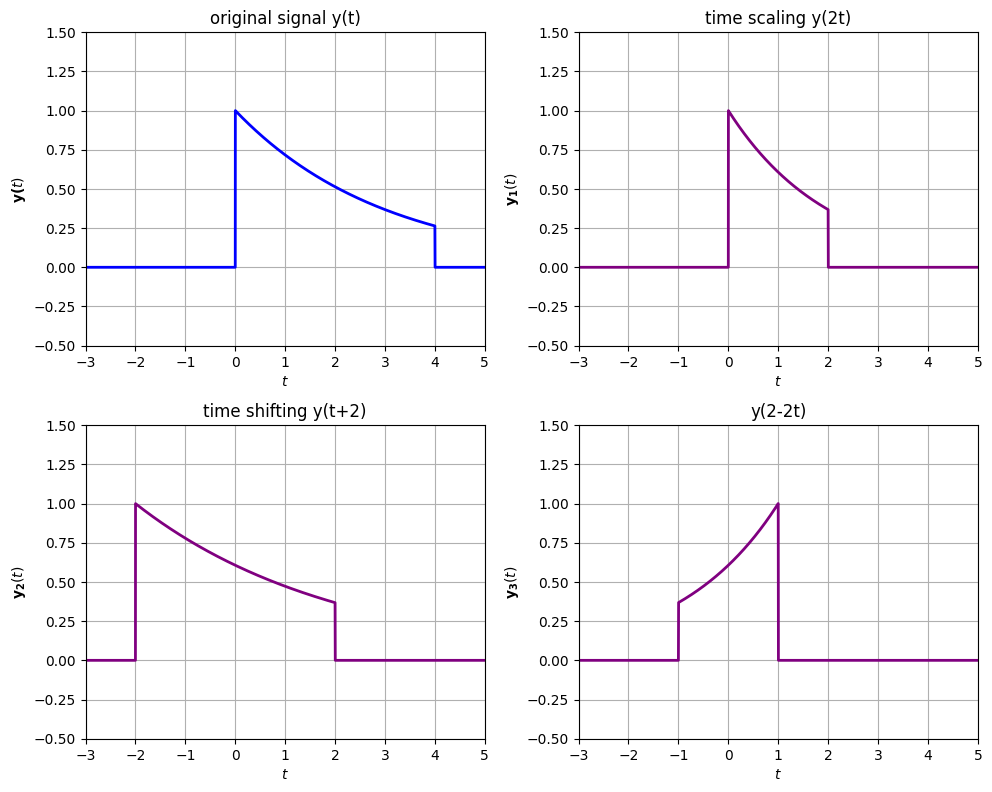

In [6]:
# Save this file as CompEX02c.py
# To apply a time domain transformation on a signal
# y=g(t), simply redefine the x-axis
# a signal, the first step is to determine
# the x-axis and the y-axis to plot
# We can first decide the range of ‘t’ for g(t)
t = np.arange(-3, 5.00, 0.002) # "t" is from -3 to 5 in 0.002 increment

# Then evaluate the signal over the range of "t" to plot
y = np.exp(-np.abs(t)/3) * (ustep(t) - ustep(t-4))

# Plot the original signal y(t)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(t, y, linewidth=2,color='b')   # plot subfigure 1 using linewidth 2
axs[0, 0].set_xlabel(r'$\it{t}$')               # use italic ‘t’ to label x-axis
axs[0, 0].set_ylabel(r'$\bf y(\it t)$')         # use boldface ‘y’ to label y-axis
axs[0, 0].set_title('original signal y(t)')
axs[0, 0].grid()

linec="purple"
# Now we evaluate the dilated signal
t1 = t * 2 # Scale in time
# Form the corresponding signal vector
y1 = np.exp(-np.abs(t1)/4) * (ustep(t1) - ustep(t1-4))
axs[0, 1].plot(t, y1, linewidth=2, color=linec)  # plot subfigure 2 using linewidth 2
axs[0, 1].set_xlabel(r'$\it{t}$')                # use italic ‘t’ to label x-axis
axs[0, 1].set_ylabel(r'${\bf y_1}({\it t })$')   # use boldface ‘y’ to label y-axis
axs[0, 1].set_title('time scaling y(2t)')
axs[0, 1].grid()

# Now we evaluate the dilated signal
t2 = t + 2 # Shift in time
y2 = np.exp(-np.abs(t2)/4) * (ustep(t2) - ustep(t2-4))
axs[1, 0].plot(t, y2, linewidth=2,color=linec)    # plot subfigure 3 using linewidth 2
axs[1, 0].set_xlabel(r'$\it{t}$')                 # use italic ‘t’ to label x-axis
axs[1, 0].set_ylabel(r'${\bf y_2}({\it t })$')    # use boldface ‘y’ to label y-axis
axs[1, 0].set_title('time shifting y(t+2)')
axs[1, 0].grid()

# Now we evaluate the dilated signal
t3 = 2 - t * 2 # Time-reversal+Scale in time
y3 = np.exp(-np.abs(t3)/4) * (ustep(t3) - ustep(t3-4))
axs[1, 1].plot(t, y3, linewidth=2,color=linec)    # plot subfigure 4 using linewidth 2
axs[1, 1].set_xlabel(r'$\it{t}$')                 # use italic ‘t’ to label x-axis
axs[1, 1].set_ylabel(r'${\bf y_3}({\it t })$')    # use boldface ‘y’ to label y-axis
axs[1, 1].set_title('y(2-2t)')
axs[1, 1].grid()

# Set the axis limits for all subfigures
for ax in axs.flat:
    ax.set_xlim([-3, 5])
    ax.set_ylim([-0.5, 1.5])

# Set the spacing between subfigures
fig.tight_layout(pad=1.0)

plt.show()

<center><b>Figure 2.28</b> Examples of basic signal operations.</center>

### 2.10.4 Periodic Signals and Signal Power
Periodic signals can be generated by first determining the signal values in one period before repeating the same signal vector multiple times. In the next cell, we generate a periodic signal and observe
its behavior over $2M$ periods. The period of this example is $T = 6$. The program also evaluates the average signal power, which is stored as a variable ``` y_power ```, and the signal energy in one period, which is stored in the variable ```y_energyT```.

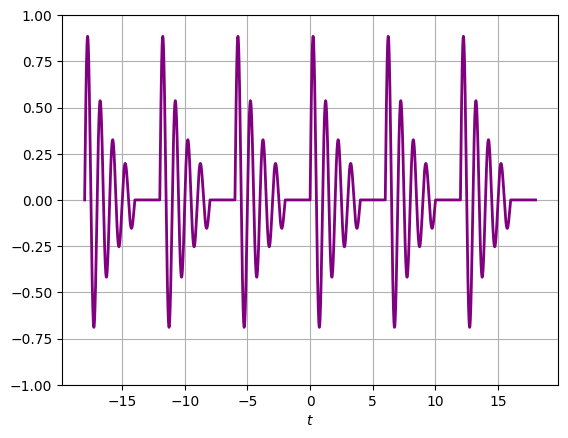

y_power = 0.08129676
y_energy_in_T = 0.48775345


In [6]:
# Save this program as PfuncEx.py
"""This example generates a periodic signal, plots the signal
and evaluates the averages signal power in y_power and signal
energy in 1 period T: y_energyT"""

# To generate a periodic signal g_T(t),
# we can first decide the signal within the period of ’T’ for g(t)
Dt = 0.002                  # Time interval (to sample the signal)
T = 6                       # period = T
M = 3                       # To generate 2M periods of the signal
t = np.arange(0, T, Dt)     # "t" goes for one period [0, T] in Dt increment

# Then evaluate the signal over the range of "T"
y = np.exp(-np.abs(t) / 2) * np.sin(2 * np.pi * t) * (ustep(t) - ustep(t - 4))

# Multiple periods can now be generated.
time = np.array([])
y_periodic = np.array([])
for i in range(-M, M):
    time = np.concatenate((time, i * T + t))
    y_periodic = np.concatenate((y_periodic, y))

plt.figure()
fy = plt.plot(time, y_periodic)
plt.setp(fy, linewidth=2,color='purple')
plt.ylim(-1, 1)
plt.xlabel(r'$t$')
plt.grid()
plt.show()

# Compute average power
y_power = np.sum(y_periodic ** 2) * Dt / (max(time) - min(time))
print("y_power = {:.8f}".format(y_power))

# Compute signal energy in 1 period T
y_energyT = np.sum(y ** 2) * Dt # or y_energyT=y_power*T
print("y_energy_in_T = {:.8f}".format(y_energyT))

<center><b>Figure 2.29</b> Generating a periodic signal.</center>

### 2.10.5 Signal Correlation
The concept of signal correlation introduced in Sec. 2.6 can be implemented directly by using Python. In the next computer example, the program evaluates the signal correlation coefficients between $x(t)$ and signals $g_1(t), g_2(t), \dots , g_5(t)$. The program first generates Fig. 2.30, which illustrates the six signals in the time domain.

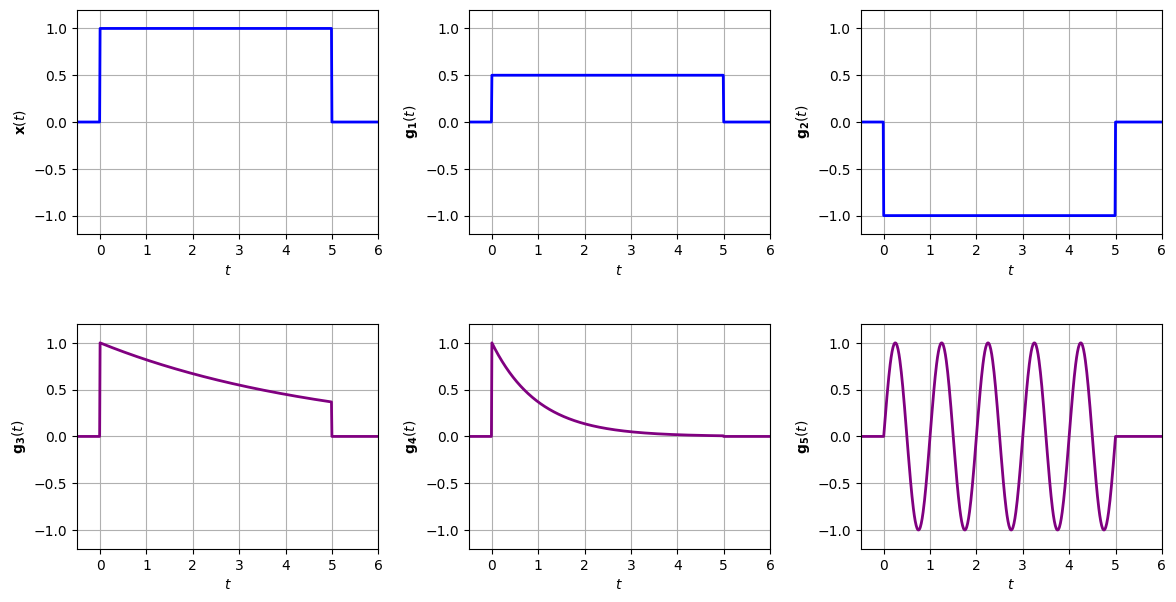

In [7]:
# Save this program as signalCor.py
"""To generate 6 signals x(t), g_1(t), ... g_5(t) of Example 2.6
we can first decide the signal within the period of ’T’ for g(t)"""
Dt = 0.01                      # time increment Dt
T = 6.0                        # time duration T
t = np.arange(-1, T+Dt, Dt)    # "t" goes between [-1, T] in Dt increment

# Then evaluate the signal over the range of "t" to plot
x = ustep(t) - ustep(t-5)
g1 = 0.5 * (ustep(t) - ustep(t-5))
g2 = -(ustep(t) - ustep(t-5))
g3 = np.exp(-t/5) * (ustep(t) - ustep(t-5))
g4 = np.exp(-t) * (ustep(t) - ustep(t-5))
g5 = np.sin(2 * np.pi * t) * (ustep(t) - ustep(t-5))

# Plotting the signals
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(14, 7)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

axs[0, 0].plot(t, x, 'b', linewidth=2)
axs[0, 0].set_xlabel(r'$t$')
axs[0, 0].set_ylabel(r'${\bf x}({\it t })$')

axs[0, 1].plot(t, g1, 'b', linewidth=2)
axs[0, 1].set_xlabel(r'$t$')
axs[0, 1].set_ylabel(r'${\bf g_1}({\it t })$')

axs[0, 2].plot(t, g2, 'b', linewidth=2)
axs[0, 2].set_xlabel(r'$t$')
axs[0, 2].set_ylabel(r'${\bf g_2}({\it t })$')

axs[1, 0].plot(t, g3, linewidth=2,color='purple')
axs[1, 0].set_xlabel(r'$t$')
axs[1, 0].set_ylabel(r'${\bf g_3}({\it t })$')

axs[1, 1].plot(t, g4, linewidth=2,color='purple')
axs[1, 1].set_xlabel(r'$t$')
axs[1, 1].set_ylabel(r'${\bf g_4}({\it t })$')

axs[1, 2].plot(t, g5, linewidth=2,color='purple')
axs[1, 2].set_xlabel(r'$t$')
axs[1, 2].set_ylabel(r'${\bf g_5}({\it t })$')
# Set the axis limits for all subfigures
for ax in axs.flat:
    ax.set_xlim([-0.5, 6])
    ax.set_ylim([-1.2, 1.2])
    ax.grid()

plt.show()

<center><b>Figure 2.30</b> Signals from Example 2.6.</center>

In [8]:
# Computing signal energies
E0 = np.sum(x * np.conj(x)) * Dt
E1 = np.sum(g1 * np.conj(g1)) * Dt
E2 = np.sum(g2 * np.conj(g2)) * Dt
E3 = np.sum(g3 * np.conj(g3)) * Dt
E4 = np.sum(g4 * np.conj(g4)) * Dt
E5 = np.sum(g5 * np.conj(g5)) * Dt

c0 = np.sum(x * np.conj(x)) * Dt/(np.sqrt(E0 * E0))
print("c0 = {:.4f}".format(c0))
c1 = np.sum(x * np.conj(g1)) * Dt/(np.sqrt(E0 * E1))
print("c1 = {:.4f}".format(c1))
c2 = np.sum(x * np.conj(g2)) * Dt/(np.sqrt(E0 * E2))
print("c2 = {:.4f}".format(c2))
c3 = np.sum(x * np.conj(g3)) * Dt/(np.sqrt(E0 * E3))
print("c3 = {:.4f}".format(c3))
c4 = np.sum(x * np.conj(g4)) * Dt/(np.sqrt(E0 * E4))
print("c4 = {:.4f}".format(c4))
c5 = np.sum(x * np.conj(g5)) * Dt/(np.sqrt(E0 * E5))
print('c5 = {:.4f}'.format(c5))

c0 = 1.0000
c1 = 1.0000
c2 = -1.0000
c3 = 0.9614
c4 = 0.6282
c5 = 0.0000


The six correlation coefficients are obtained from the program as
``` python
c0 = 1
c1 = 1
c2 = -1
c3 = 0.9614
c4 = 0.6282
c5 = 3.0146e-17
```

### 2.10.6 Numerical Computation of Coefficients $D_n$
There are several ways to numerically compute the Fourier series coefficients $D_n$. We will use Python to present two different methods. Specifically, we will show how to numerically evaluate the Fourier series by means of numerical integration and fast Fourier transform.

**Direct Numerical Integration**: The direct method is to carry out a direct numerical integration of Eq. (2.92) by defining the symbolic function $g(t)$ along with its period. The first step is to define the symbolic expression of the signal $g(t)$ under analysis. We use the triangle function $\Delta(t)$ in the following example.

In [9]:
# Run this program first to import Python packages
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import quad
# A standard triangle function of base -1 to 1
# t = input variable
def funct_tri(t):
    y = int((t > -1) and (t < 1)) * (1 - np.absolute(t))
    return y

# Quad function for complex numbers
# Usage: y = complex_quadrature(func, a, b, epsabs)
# func: a Python function or method to integrate
# a = lower limit of integration
# b = upper limit of integration
# epsabs = absolute error tolerance
def complex_quadrature(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    return real_integral[0] + 1j*imag_integral[0]

Once the cell above has defined the function y = g(t), we can directly carry out the necessary integration of Eq. (2.92) for a finite number of Fourier series coefficients $\{D_n, n =−N, \dots , −1, 0, 1, \dots , N\}$. We provide a function to evaluate the Fourier series of $\Delta(t/2)$ with period $[a, b]\ (a =−2, b = 2)$. In this example, $N = 11$ is selected. Executing this short program in Python will generate Fig. 2.31 with both the magnitude and angle of $D_n$.

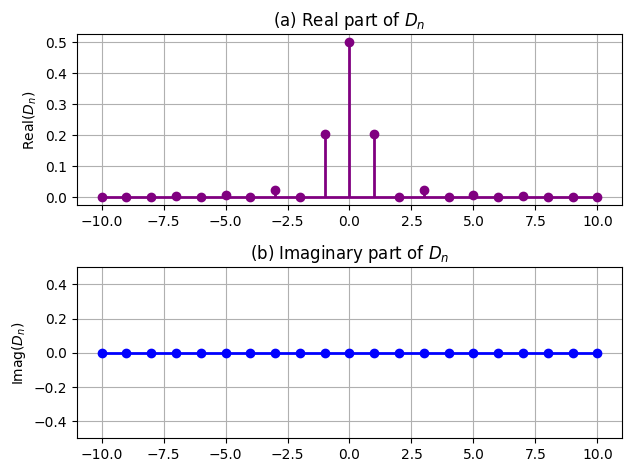

In [10]:
# Save this program as FSdirect.py
b = 2
a = -2                # Determine one signal period
tol = 1e-6            # Set integration error tolerance
T = b - a             # Length of the period
N = 10                # Number of FS coefficients on each side of zero frequency
Fi = np.arange(-N, N+1) * 2 * np.pi / T    # Set frequency range

# first calculate D0 and store it in D[N]
Func = lambda t: funct_tri(t/2)
D = np.zeros(2 * N + 1, dtype=complex)
D[N] = 1/T * complex_quadrature(Func, a, b, epsabs=tol)

for i in range(N):
    # Calculate Dn for n=1,...,N (stored in D[N+1] ... D[2N]
    Func = lambda t: np.exp(-1j*2*np.pi*t*(i+1)/T) * funct_tri(t/2)
    D[N+i+1] = 1/T * complex_quadrature(Func, a, b, epsabs=tol)

    # Calculate Dn for n=-N,...,-1 (stored in D[0] ... D[N-1]
    Func = lambda t: np.exp(1j*2*np.pi*t*(N-i)/T) * funct_tri(t/2)
    D[i] = 1/T * complex_quadrature(Func, a, b, epsabs=tol)
fig = plt.figure()
plt.subplot(211)
s1 = plt.stem(np.arange(-N, N+1), D.real)
plt.setp(s1, linewidth=2,color='purple')
plt.ylabel(r'Real($D_n$)')
plt.title(r'(a) Real part of $D_n$')
plt.grid()

plt.subplot(212)
s2 = plt.stem(np.arange(-N, N+1), np.imag(D))
plt.setp(s2, linewidth=2,color='blue')
plt.ylabel(r'Imag($D_n$)')
plt.title('(b) Imaginary part of $D_n$')
plt.grid();plt.ylim(-0.5, 0.5)

# Set the spacing between subfigures
fig.tight_layout(pad=1.0)
plt.show()

<span style="color:red"> <b>*Note: Python handles high precision numbers differently as MATLAB, but both versions shows aliasing error in angles*</b></span>

<center><b>Figure 2.31</b> Exponential Fourier series coefficients of a repeated $(t/2)$ with period $T =4$ showing (a) amplitude and (b) angle of $D_n$.</center>

<span style="color:red"> <b>*Note: Introduction on pages 78-79 is not included here*</b></span>

## COMPUTER EXAMPLE
Compute and plot the trigonometric and exponential Fourier spectra for the periodic signal in Fig. 2.19b (Example 2.7).

The samples of $g(t)$ start at $ t = 0 $ and the last ($N_0$th) sample is at $ t = T_0 − T_s $ (the last sample is not at $ t = T_0 $ because the sample at $ t = 0 $ is identical to the sample at $ t = T_0 $, and the next cycle begins at $ t = T_0 $). At the points of discontinuity, the sample value is taken as the average of the values of the function on two sides of the discontinuity. Thus, in the present case, the first sample (at $ t = 0 $) is not $1$, but $(e^{−\pi/2} +1)/2 = 0.604$. To determine $N_0$, we require $D_n$ for $n \geq N_0/2 $ to be relatively small. Because $ g(t) $ has a jump discontinuity, $ D_n $ decays rather slowly as $1/n$. Hence, choice of $N_0 = 64$ is acceptable because the ($N_0/2$)nd ($32$th) cofficient $|D_{32}|$ is about $0.01$ (about $ 1\% $) of $|D_1|$.

We write a Python program to compute and plot the Fourier coefficients.

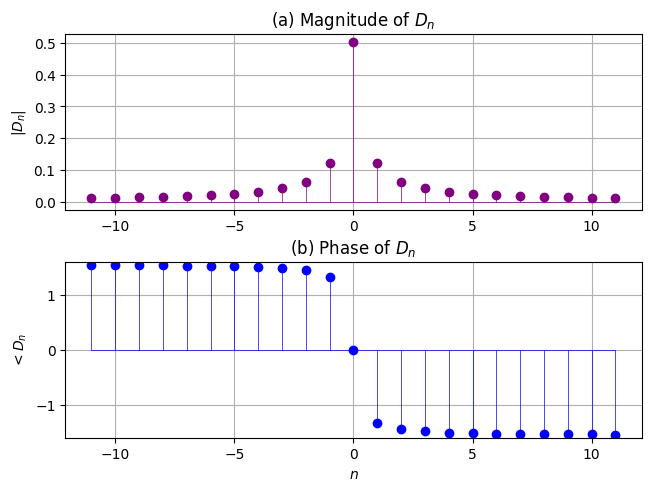

In [13]:
# Save this program as FSfftmethod.py
T0 = np.pi
N0 = 64; Ts = T0/N0; M = 12;
Nhalf=N0//2

# You can select N0 and M components
t = np.arange(0, Ts*N0, Ts)
g = np.exp(-t/2)
g[0] = 0.604

Gn = np.fft.fft(g)/N0 # fft(g) is the FFT
Gangle, Gmag = np.angle(Gn), np.absolute(Gn)

# We need to reorder the Gfft to get Dn
Dn=np.append(Gn[N0-M+1:N0],Gn[0:M])
Dnangle, Dnmag = np.angle(Dn), np.absolute(Dn)

n = np.arange(0, len(Dn))-(M-1)
fig = plt.figure()
plt.subplot(211)
s1 = plt.stem(n, Dnmag)
plt.setp(s1, linewidth=0.5,color='purple')
plt.ylabel(r'$|D_n|$')
plt.title(r'(a) Magnitude of $D_n$')
plt.grid()

plt.subplot(212)
s2 = plt.stem(n, Dnangle)
plt.setp(s2, linewidth=0.5,color='blue')
plt.ylabel(r'$<D_n$'); plt.xlabel(r'$n$')
plt.title('(b) Phase of $D_n$')
plt.grid();plt.ylim(-1.6, 1.6)
fig.tight_layout(pad=.3)
plt.show()

To compute trigonometric Fourier series coefficients, we run the code cell above along with the following commands to convert $ D_n $ into $ C_n $ and $\theta_n$.

Amplitudes |   Angles
 0.5043    |   0.0000
 0.2444    |  -75.9403
 0.1247    |  -82.8279
 0.0832    |  -85.1653
 0.0621    |  -86.3282
 0.0494    |  -87.0171
 0.0408    |  -87.4676
 0.0346    |  -87.7811
 0.0299    |  -88.0083
 0.0262    |  -88.1771
 0.0231    |  -88.3044
 0.0206    |  -88.4005


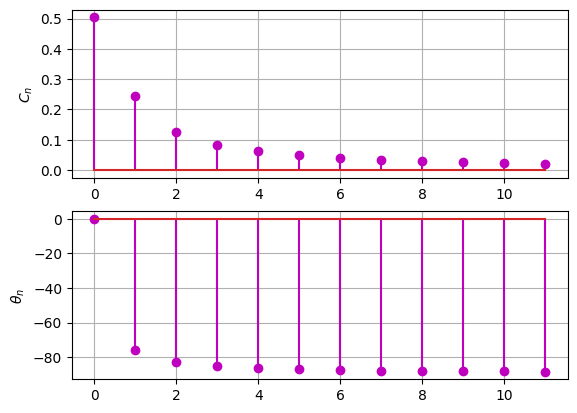

In [15]:
# Save this program as FSfftCompact.py
C0=Gmag[0]
Cn=2*Gmag[1:M]
Amplitudes=[C0]+list(Cn)
Angles=Gangle[0:M]*(180/np.pi)
print('Amplitudes |   Angles')
for (amplitude, angle) in zip(Amplitudes, Angles):
    print(" {0: <1.4f}    |  {1: < 3.4f}".format(amplitude, angle))

# To Plot the Fourier coefficients
xaxis=np.arange(len(Amplitudes))
plt.subplot(211); plt.ylabel(r'$C_n$')
plt.stem(xaxis,Amplitudes,'m'); plt.grid()
plt.subplot(212); plt.ylabel(r'$\theta_n$')
plt.stem(xaxis,Angles,'m');plt.grid()
plt.show()